In [1]:
import networkx as nx
from matplotlib import pyplot, patches
from scipy import io
import numpy as np
from collections import defaultdict
import louvain
import pickle
from tqdm import tqdm
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt 

C:\Users\wyw25\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\wyw25\AppData\Local\Temp/ipykernel_13436/254710273.py:6: DeprecationWarning: This package has been superseded by the `leidenalg` package and will no longer be maintained. Please upgrade to the `leidenalg` package.
  import louvain


In [2]:
N = 10 # number of nodes
P = np.random.rand(10, 10) # your "matrix of probabilities"
adjacency = np.random.rand(*P.shape) <= P # adjacency[ii, jj] is True with probability P[ii, jj]


In [12]:
graph = nx.from_numpy_matrix(adjacency, nx.Graph) # assuming the graph is supposed to be directed, presumably if P[ii, jj] != P[jj, ii]

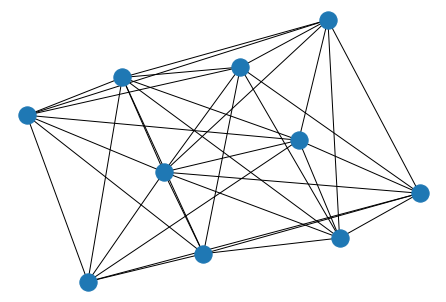

In [13]:
nx.draw(graph)

In [2]:
import networkx as nx
import itertools
import random
def setup_nodes_edges(n, p_matrix):
    nodes = list(range(n))
    edges = set()
    for combination in itertools.combinations(nodes, 2):
        x, y = combination
        if p_matrix[x][y] <= random.random():
            edges.add(combination)
    return nodes, edges

nodes, edges = setup_nodes_edges(10, P) # I assume you have a p_matrix
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

NameError: name 'P' is not defined

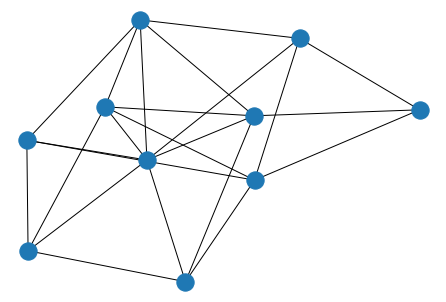

In [11]:
nx.draw(G)

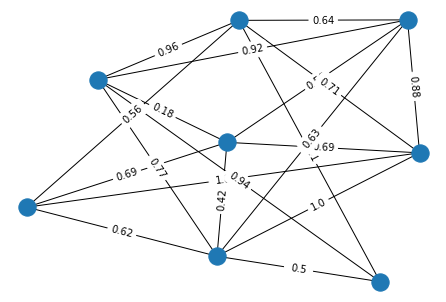

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

N = 8
m = np.random.random(N*N).reshape(N, N)
for i in range(N): m[i, i] = 0

nodes = range(N)
edges = {}
for i in range(N):
    for j in range(N):
        if np.random.random() < m[i, j]:
            edges[(i, j)] = round(m[i, j], 2)

G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edges)
plt.show()

In [184]:
Mat=[[0,1,1,0,0,0],
    [1,0,1,0,1,1],
    [1,1,0,1,1,0],
    [0,0,1,0,0,0],
    [0,1,1,0,0,0],
    [0,1,0,0,0,0]]

In [116]:
np.sum(Mat, axis=0)

array([2, 4, 4, 1, 2, 1])

In [3]:
def Prob_links(Mat,alpha):
    N=len(Mat)
    incr_m=Mat
    decay_m=[[0] * N for row in range(N)]
    # degree for each mode 
    Degree=np.sum(Mat, axis=0)
   

    for i in range(N):
        Value={}
        Decline={}
        for j in range(i+1,N):  # the node i with j
            if Mat[i][j]==0:  # no link
                Value[j]=Degree[j] # degree is the value     
                    
            if Mat[i][j]==1:  # with link
                Decline[j]=Degree[j] # degree is the value
                
    #    print(Value)
        max_keys=0
        max_value=0
        if len(Value) >0:
            max_value = max(Value.values())  # maximum value
            max_keys = [k for k, v in Value.items() if v == max_value]    # maximun keys    
    #    print(max_keys)
        # count the number of maxium keys for divider
        if max_keys != 0:
            for k in max_keys:
                incr_m[i][k]=  alpha/len(max_keys)
                incr_m[k][i]=  alpha/len(max_keys)
          
                
        min_keys=0
        min_value=0
        if len(Decline) >0:
            min_value = min(Decline.values())  # min value
            min_keys = [k for k, v in Decline.items() if v == min_value]    # min keys    
            
        if min_keys != 0:
            for k in min_keys:
                decay_m[i][k]=  (1-alpha)/len(min_keys)
                decay_m[k][i]= (1- alpha)/len(min_keys)         
                            
        
    return  incr_m, decay_m

        

In [4]:
def CreatMat(incr_m,decay_m):
    B=np.random.rand(*np.array(incr_m).shape)
    B_symm = (B + B.T)/2
    adjacency_add = B_symm  <= np.array(incr_m) # adjacency[ii, jj] is True with probability P[ii, jj]
    adjacency_de = B_symm  <= np.array(decay_m) # adjacency[ii, jj] is True with probability P[ii, jj]
    
    New_Mat=adjacency_add*1-adjacency_de*1
       
    
 #   print(New_Mat)
    return New_Mat.tolist()
    

In [5]:
def Make_stable(Mat,n,alpha):
    for i in tqdm(range(n)):
        incr_m,decay_m=Prob_links(Mat,alpha)
        Mat=CreatMat(incr_m,decay_m)
            
    return Mat
    

In [6]:
def Make_Ori_Mat(N):
    MATRIX=np.random.rand(N,N)
    np.fill_diagonal(MATRIX, 0)
    bollmat = 0.5  <= MATRIX
    nummat=1*bollmat
    randmat=np.minimum( nummat, nummat.transpose() )
    
    return randmat.tolist()
    

In [10]:
def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(5, 5)) # in inches
    pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
            current_idx += len(module)

In [15]:
def NODF(M):
    '''
    function to calculate the nestedness by overlap and decreasing fill (NODF).
    Metric developed by Almeida-Neto et al., 2008.

    Inputs:
    ----------
        M: array
            An matrix to which I want to calculate the NODF
    
    output:
    ----------
    NODF: number
        The NODF score for the whole matrix
    '''
    rw,cl=M.shape
    colN=np.zeros((cl,cl))
    rowN=np.zeros((rw,rw))
    
    #Find NODF column score
    for i in range(cl-1): # at a left position with respect to column j
      	for j in range(i+1,cl):
              #if (i!=j):
            if (np.sum(M[:,i])>np.sum(M[:,j]))&(np.sum(M[:,j])>0): # DF =! to zero, then NP =! to zero
                colN[i,j]=(M[:,i]*M[:,j]).sum()/(np.sum(M[:,j]))
    
#    NODF_COL = (2*np.sum(colN)/(cl*(cl-1)))*100
    
    #Find NODF row score
    for i in range(rw-1): #at an upper position with respect to row j
        for j in range(i+1,rw):
            #if (i!=j):
            if (np.sum(M[i,:])>np.sum(M[j,:]))&(np.sum(M[j,:])>0): # DF =! to zero, then NP =! to zero
                rowN[i,j]=(M[i,:]*M[j,:]).sum()/(np.sum(M[j,:]))
    
#    NODF_ROW = (2*np.sum(rowN)/(rw*(rw-1)))*100
    
    #Find NODF
    NODF=(2*(np.sum(rowN)+np.sum(colN))/(cl*(cl-1) + rw*(rw-1) ))
    return  NODF

In [35]:
Mat=Make_Ori_Mat(150)

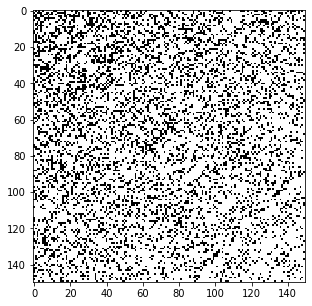

In [36]:
G=nx.from_numpy_matrix(np.array(Mat))
degreeofday=dict(G.degree)
degreeofday_new={k: v for k, v in sorted(degreeofday.items(), key=lambda item: item[1], reverse=True)}
nodenewlist=list(degreeofday_new.keys())
draw_adjacency_matrix(G,nodenewlist)

In [346]:
Mat=[[0,1,1,0,0,0],
    [1,0,1,0,1,1],
    [1,1,0,1,1,0],
    [0,0,1,0,0,0],
    [0,1,1,0,0,0],
    [0,1,0,0,0,0]]

In [37]:
mmmm=Make_stable(Mat,1000,0.4)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 83.28it/s]


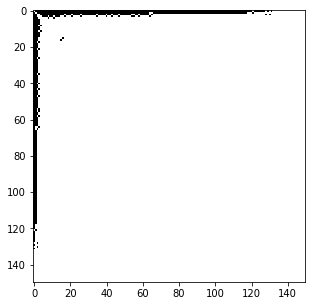

In [38]:
G=nx.from_numpy_matrix(np.array(mmmm))
degreeofday=dict(G.degree)
degreeofday_new={k: v for k, v in sorted(degreeofday.items(), key=lambda item: item[1], reverse=True)}
nodenewlist=list(degreeofday_new.keys())
draw_adjacency_matrix(G,nodenewlist)

In [39]:
NODF(np.array(mmmm))

0.23272153945979449

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 81.50it/s]


0.34874529978616414

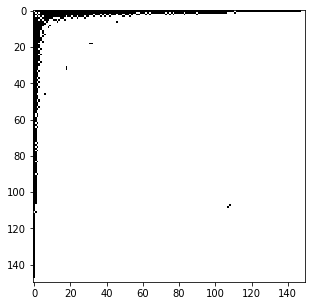

In [40]:
mmmm=Make_stable(Mat,1000,0.45)
G=nx.from_numpy_matrix(np.array(mmmm))
degreeofday=dict(G.degree)
degreeofday_new={k: v for k, v in sorted(degreeofday.items(), key=lambda item: item[1], reverse=True)}
nodenewlist=list(degreeofday_new.keys())
draw_adjacency_matrix(G,nodenewlist)
NODF(np.array(mmmm))

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 86.51it/s]


0.2841074685940458

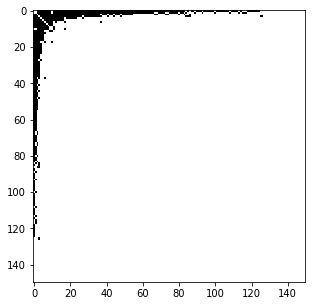

In [41]:
mmmm=Make_stable(Mat,1000,0.48)
G=nx.from_numpy_matrix(np.array(mmmm))
degreeofday=dict(G.degree)
degreeofday_new={k: v for k, v in sorted(degreeofday.items(), key=lambda item: item[1], reverse=True)}
nodenewlist=list(degreeofday_new.keys())
draw_adjacency_matrix(G,nodenewlist)
NODF(np.array(mmmm))

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 76.52it/s]


0.43800362701829604

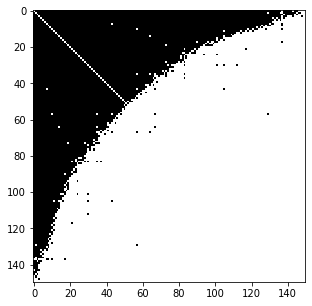

In [42]:
mmmm=Make_stable(Mat,1000,0.5)
G=nx.from_numpy_matrix(np.array(mmmm))
degreeofday=dict(G.degree)
degreeofday_new={k: v for k, v in sorted(degreeofday.items(), key=lambda item: item[1], reverse=True)}
nodenewlist=list(degreeofday_new.keys())
draw_adjacency_matrix(G,nodenewlist)
NODF(np.array(mmmm))

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 78.97it/s]


0.5300414601043417

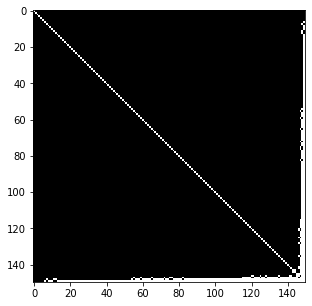

In [43]:
mmmm=Make_stable(Mat,1000,0.6)
G=nx.from_numpy_matrix(np.array(mmmm))
degreeofday=dict(G.degree)
degreeofday_new={k: v for k, v in sorted(degreeofday.items(), key=lambda item: item[1], reverse=True)}
nodenewlist=list(degreeofday_new.keys())
draw_adjacency_matrix(G,nodenewlist)
NODF(np.array(mmmm))

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 75.46it/s]


0.10461333817038516

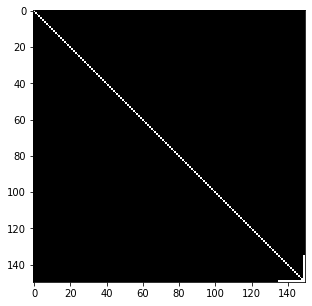

In [44]:
mmmm=Make_stable(Mat,1000,0.8)
G=nx.from_numpy_matrix(np.array(mmmm))
degreeofday=dict(G.degree)
degreeofday_new={k: v for k, v in sorted(degreeofday.items(), key=lambda item: item[1], reverse=True)}
nodenewlist=list(degreeofday_new.keys())
draw_adjacency_matrix(G,nodenewlist)
NODF(np.array(mmmm))

In [494]:
import csv

with open("mat1000_04.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(mmmm)

In [495]:
mmmm48=Make_stable(Mat,100000,0.48)

100%|███████████████████████████████████████████████████████████████████████| 100000/100000 [14:07:28<00:00,  1.97it/s]


C:\Users\wyw25\AppData\Local\Temp/ipykernel_91228/3589230769.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)


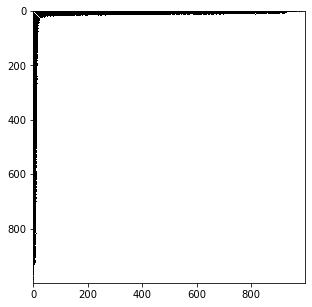

In [496]:
G=nx.from_numpy_matrix(np.array(mmmm48))
degreeofday=dict(G.degree)
degreeofday_new={k: v for k, v in sorted(degreeofday.items(), key=lambda item: item[1], reverse=True)}
nodenewlist=list(degreeofday_new.keys())
draw_adjacency_matrix(G,nodenewlist)

In [497]:
with open("mat1000_48.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(mmmm48)

In [498]:
mmmm495=Make_stable(Mat,100000,0.495)

100%|███████████████████████████████████████████████████████████████████████| 100000/100000 [14:01:01<00:00,  1.98it/s]


C:\Users\wyw25\AppData\Local\Temp/ipykernel_91228/3589230769.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)


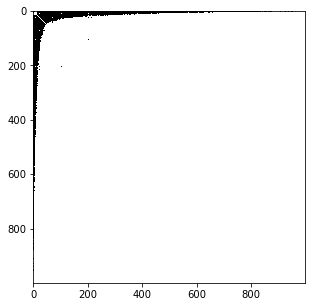

In [499]:
G=nx.from_numpy_matrix(np.array(mmmm495))
degreeofday=dict(G.degree)
degreeofday_new={k: v for k, v in sorted(degreeofday.items(), key=lambda item: item[1], reverse=True)}
nodenewlist=list(degreeofday_new.keys())
draw_adjacency_matrix(G,nodenewlist)

In [500]:
with open("mat1000_495.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(mmmm495)

In [501]:
mmmm495=Make_stable(Mat,100000,0.5)

100%|███████████████████████████████████████████████████████████████████████| 100000/100000 [14:25:29<00:00,  1.93it/s]


C:\Users\wyw25\AppData\Local\Temp/ipykernel_91228/3589230769.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)


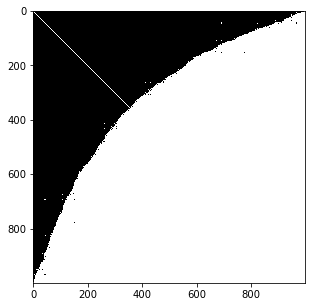

In [503]:
G=nx.from_numpy_matrix(np.array(mmmm495))
degreeofday=dict(G.degree)
degreeofday_new={k: v for k, v in sorted(degreeofday.items(), key=lambda item: item[1], reverse=True)}
nodenewlist=list(degreeofday_new.keys())
draw_adjacency_matrix(G,nodenewlist)

In [ ]:
with open("mat1000_5.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(mmmm5)

In [504]:
mmmm50=Make_stable(mmmm495,200000,0.5)

100%|███████████████████████████████████████████████████████████████████████| 200000/200000 [27:00:52<00:00,  2.06it/s]


C:\Users\wyw25\AppData\Local\Temp/ipykernel_91228/3589230769.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)


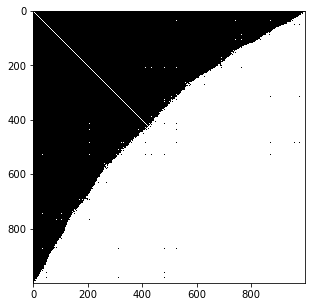

In [505]:
G=nx.from_numpy_matrix(np.array(mmmm50))
degreeofday=dict(G.degree)
degreeofday_new={k: v for k, v in sorted(degreeofday.items(), key=lambda item: item[1], reverse=True)}
nodenewlist=list(degreeofday_new.keys())
draw_adjacency_matrix(G,nodenewlist)

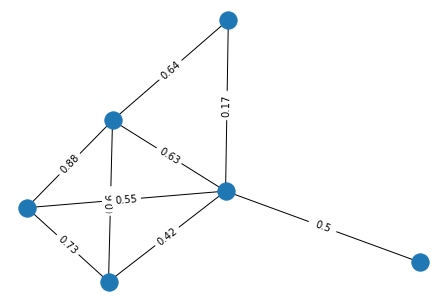

In [129]:
nodes = range(6)
edges = {}
for i in range(6):
    for j in range(6):
        if np.random.random() < m[i, j]:
            edges[(i, j)] = round(m[i, j], 2)

G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edges)
plt.show()
    

In [ ]:
import numpy as np

N = 100
b = np.random.random_integers(-2000,2000,size=(N,N))
b_symm = (b + b.T)/2

In [134]:
B=np.random.rand(*np.array(A).shape)
B_symm = (B + B.T)/2
adjacency = B_symm  <= np.array(A) # adjacency[ii, jj] is True with probability P[ii, jj]

In [135]:
adjacency

array([[False,  True,  True, False, False, False],
       [ True, False,  True, False,  True,  True],
       [ True,  True, False,  True,  True,  True],
       [False, False,  True, False, False, False],
       [False,  True,  True, False, False, False],
       [False,  True,  True, False, False, False]])